In [1]:
import pyBigWig
from pathlib import Path
import glob
import shlex
import subprocess
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
countfn = 'dmr-atac_noexon.txt'
counts = pd.DataFrame(np.loadtxt(countfn, dtype=str).reshape(-1,10), 
                      columns=['type', '#peak', '_', '#dmr hypo', 'dmr_on_atac hypo', 'atac_on_dmr hypo', 
                               '_', '#dmr hyper', 'dmr_on_atac hyper', 'atac_on_dmr hyper'])
counts = counts.set_index('type')
counts = counts.loc[~counts.index.str.contains('Endo|OPC|Astro|Micro_PVM|VLMC|Oligo')]
counts = counts.drop(columns='_').astype(int)

In [3]:
subclass = [
    'L2_3_IT', 
    'L5_IT', 
    'L5_ET', 
    'L5_6_NP',
    'L6_IT', 
    'L6_IT_Car3',
    'L6b', 
    'L6_CT', 
    'Pvalb', 'Sst','Sst_Chodl', 'Sncg', 'Lamp5',  'Vip'
]
dmr_on_atac = counts.loc[subclass, ['#dmr hypo', 'dmr_on_atac hypo', '#dmr hyper', 'dmr_on_atac hyper']]
atac_on_dmr = counts.loc[subclass, ['#peak', 'atac_on_dmr hypo', 'atac_on_dmr hyper']]

## ED7f

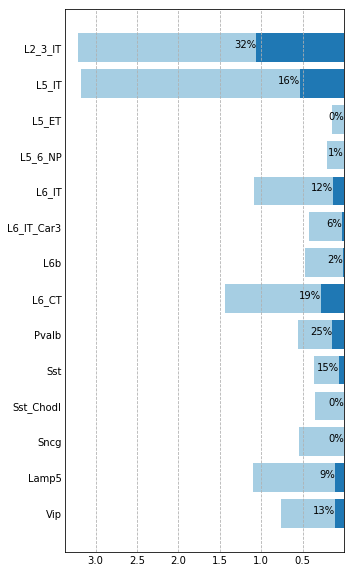

In [4]:
plt.figure(figsize=(5,10))
plt.grid(axis='x', linestyle='--')

plt.barh(range(len(dmr_on_atac)), dmr_on_atac['#dmr hypo'], color='#a6cee3')
plt.barh(range(len(dmr_on_atac)), dmr_on_atac['dmr_on_atac hypo'], color = '#1f78b4')
ax = plt.gca()
ax.invert_xaxis()
ax.invert_yaxis()
ax.set_yticks(range(len(subclass)))
ax.set_yticklabels(subclass)
xrange = list(range(50000, 300001, 50000))
ax.set_xticks(xrange)
ax.set_xticklabels('%.1f'%(x/100000) for x in xrange)
ax.tick_params(length=0)

perc = dmr_on_atac['dmr_on_atac hypo']*100//dmr_on_atac['#dmr hypo']
for i,x in enumerate(dmr_on_atac['dmr_on_atac hypo']):
    ax.text(x,i, f'{perc[i]}%', horizontalalignment='right')
    
plt.show()

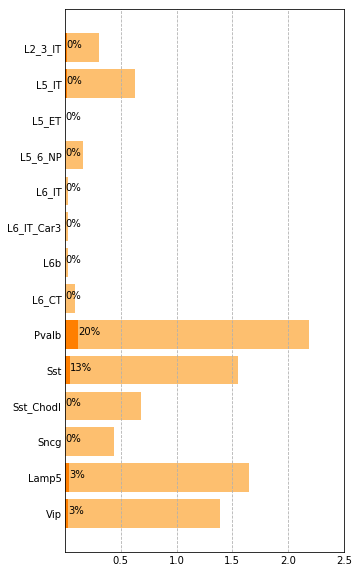

In [5]:
plt.figure(figsize=(5,10))
plt.grid(axis='x', linestyle='--')

plt.barh(range(len(dmr_on_atac)), dmr_on_atac['#dmr hyper'], color='#fdbf6f')
#
#
plt.barh(range(len(dmr_on_atac)), dmr_on_atac['dmr_on_atac hyper'], color = '#ff7f00')
ax = plt.gca()
# ax.invert_xaxis()
ax.invert_yaxis()
ax.set_yticks(range(len(subclass)))
ax.set_yticklabels(subclass)
xrange = list(range(50000, 250001, 50000))
ax.set_xticks(xrange)
ax.set_xticklabels('%.1f'%(x/100000) for x in xrange)
ax.tick_params(length=0)

perc = dmr_on_atac['dmr_on_atac hyper']*100//dmr_on_atac['#dmr hypo']
for i,x in enumerate(dmr_on_atac['dmr_on_atac hyper']):
    ax.text(x,i, f'{perc[i]}%', horizontalalignment='left')
    

plt.show()

## ED7g

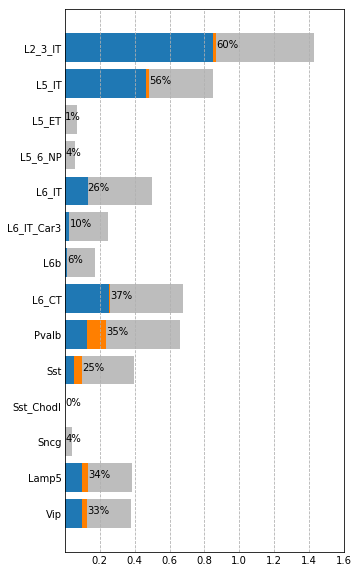

In [6]:
plt.figure(figsize=(5,10))
plt.grid(axis='x', linestyle='--')

plt.barh(range(len(atac_on_dmr)), atac_on_dmr['#peak'], color='#bdbdbd')

plt.barh(range(len(atac_on_dmr)), atac_on_dmr['atac_on_dmr hypo']+atac_on_dmr['atac_on_dmr hyper'], 
         color = '#ff7f00')
plt.barh(range(len(atac_on_dmr)), atac_on_dmr['atac_on_dmr hypo'], color = '#1f78b4')
ax = plt.gca()
# ax.invert_xaxis()
ax.invert_yaxis()
ax.set_yticks(range(len(subclass)))
ax.set_yticklabels(subclass)
xrange = list(range(20000, 160001, 20000))
ax.set_xticks(xrange)
ax.set_xticklabels('%.1f'%(x/100000) for x in xrange)
ax.tick_params(length=0)

perc = (atac_on_dmr['atac_on_dmr hyper']+atac_on_dmr['atac_on_dmr hypo'])*100//atac_on_dmr['#peak']
for i,x in enumerate(atac_on_dmr['atac_on_dmr hyper']+atac_on_dmr['atac_on_dmr hypo']):
    ax.text(x,i, f'{perc[i]}%', horizontalalignment='left')
    
plt.show()

## legend bar

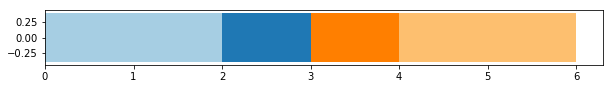

In [7]:
plt.figure(figsize=(10,1))
plt.barh([0],[6], color='#fdbf6f')
plt.barh([0],[4], color='#ff7f00')
plt.barh([0],[3], color='#1f78b4')
plt.barh([0],[2], color='#a6cee3')
plt.show()

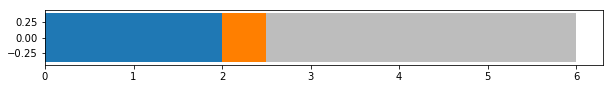

In [8]:
plt.figure(figsize=(10,1))
plt.barh([0],[6], color='#bdbdbd')
plt.barh([0],[2.5], color='#ff7f00')
plt.barh([0],[2], color='#1f78b4')
plt.show()